In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Sprite utils

In [4]:
import sys
sys.path.append("../")

import westworld
from westworld.assets.sprites.utils import *
from westworld.assets import make_arrow
from westworld.colors import *
from westworld.environment import GridEnvironment
from westworld.agents.sir_agent import SIRAgent
from westworld.environment.spatial import SpatialEnvironment
from westworld.agents import BaseAgent
from westworld.agents.collectible_finder import CollectibleFinderAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible,BaseRectangle
from westworld.objects import BaseLayer
from westworld.simulation import Simulation
from westworld.colors import *
from westworld.logger import Logger

In [7]:
!ls layers

GeneratedMaze_cellsize=10.png
GeneratedMaze_cellsize=20.png
Layer_1590257407_boxsize=20.png
Layer_1590260841_boxsize=10.png
ceintrey_manual.png
maze_manual1.png
simple_schema.jpg


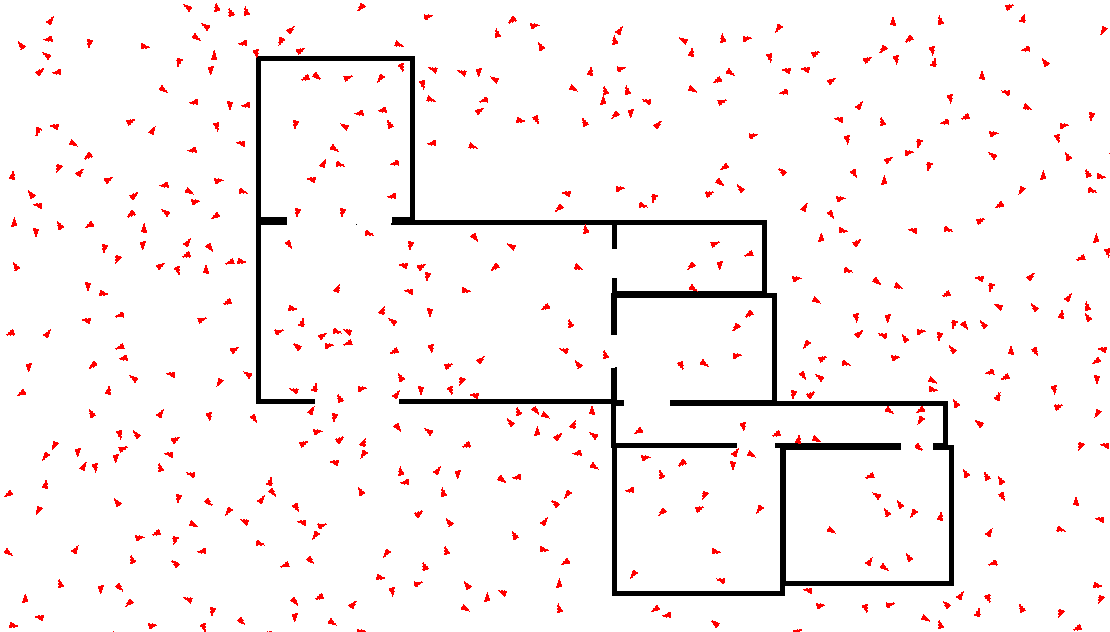

In [26]:
# Prepare layer
layer = BaseLayer(img_filepath = "layers/ceintrey_manual.png",img_transparency = (255,255,255))

class Agent(BaseAgent):
    
    @property
    def blocking(self):
        return True
    
    def when_blocked(self,collisions):
        self.set_direction()
    
    def step(self):
        self.wander()
        

spawner = lambda x,y : Agent(x,y,width = 10,height = 10,img_asset = "arrow",img_rotate = True)
# spawner = lambda x,y : Agent(x,y,width = 20,height = 20,img_asset = "blob",img_rotate = False,color = (100,200,100))

        
env = SpatialEnvironment(objects = [layer],background_color = WHITE)
env.spawn(spawner,500)

env.render()
env.get_img()

In [27]:
sim = Simulation(env,fps = 25)
sim.run_episode(n_steps = 300,save = True,replay=True,fps_replay = 25,save_format = "video")

[INFO] Saving video at ./captures/Simulation_1593285006.mp4



interactive(children=(Play(value=0, description='Press play', interval=40, max=284), Output()), _dom_classes=(…

IntSlider(value=0, max=284)

In [37]:
sim._save_video_from_images("test2.mp4")

ValueError: not enough values to unpack (expected 4, got 0)